<a href="https://colab.research.google.com/github/RiteshW991/Machine-Learning/blob/main/UnsupervisedModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving UnlabeledWiDS2021.csv to UnlabeledWiDS2021 (1).csv


In [ ]:
import pandas as pd
data = pd.read_csv('UnlabeledWiDS2021.csv')

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10234 entries, 0 to 10233
Columns: 180 entries, Unnamed: 0 to solid_tumor_with_metastasis
dtypes: float64(156), int64(18), object(6)
memory usage: 14.1+ MB
None


In [ ]:
print(data.head(3))

      Unnamed: 0  encounter_id  hospital_id  age   bmi  elective_surgery  \
7996        7997        138301        10079   18  24.0                 0   
8042        8043        136165        10079   84  20.1                 1   
8055        8056        139006        10079   73  47.1                 1   

      height  icu_id  pre_icu_los_days  readmission_status  ...  cirrhosis  \
7996   188.0     975          0.105556                   0  ...          0   
8042   173.0     975          3.797917                   0  ...          0   
8055   168.0     975          0.244444                   0  ...          0   

      hepatic_failure  immunosuppression  leukemia  lymphoma  \
7996                0                  0         0         0   
8042                0                  0         0         0   
8055                0                  0         0         0   

      solid_tumor_with_metastasis  cluster     pca_1      pca_2  \
7996                            0        1 -7.884118   3.7

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [ ]:
data.dropna(inplace=True)
nonNumericColumns = data.select_dtypes(exclude=[np.number]).columns
data = data.drop(nonNumericColumns, axis=1)
scaler = StandardScaler()
scaledData = scaler.fit_transform(data)

In [ ]:
k = 2
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
kmeans.fit(scaledData)
data['kmeans_cluster'] = kmeans.labels_
avg = silhouette_score(scaledData, kmeans.labels_)
print(f"Silhouette Score:{avg}")

Silhouette Score:0.1338724849175463


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
num_components = 2
pca = PCA(n_components=num_components)
data_pca = pca.fit_transform(scaledData)
data['pca_1'] = data_pca[:, 0]
data['pca_2'] = data_pca[:, 1]

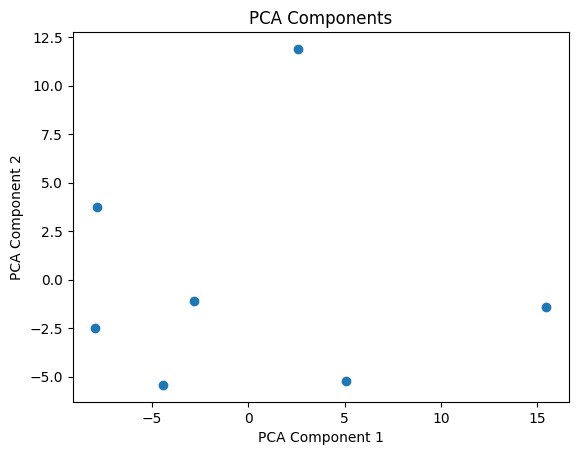

In [ ]:
plt.scatter(data['pca_1'], data['pca_2'])
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Components')
plt.show()

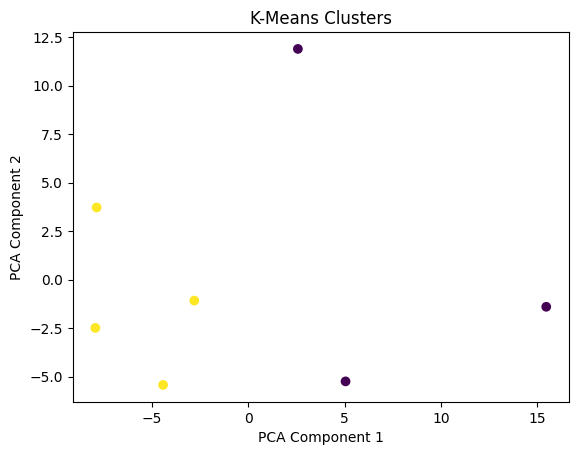

In [ ]:
if k == 2 or k == 3:
    plt.scatter(data['pca_1'], data['pca_2'], c=data['kmeans_cluster'])
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title('K-Means Clusters')
    plt.show()